In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt



In [3]:
import os
print("Current directory:", os.getcwd())


Current directory: d:\Projects\PYTHON\catAndDog\dataset


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Path to your existing data
base_path = r"C:\Users\ADITYA\Downloads\dataset"
train_path = os.path.join(base_path, "training_set")
test_path = os.path.join(base_path, "test_set")

# Generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\ADITYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    train_set,
    steps_per_epoch=100,  # batches per epoch
    epochs=100,
    validation_data=test_set,
    validation_steps=50)


Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.7487 - loss: 0.5189 - val_accuracy: 0.7519 - val_loss: 0.5175
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - accuracy: 0.7401 - loss: 0.5151 - val_accuracy: 0.7525 - val_loss: 0.5089
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.7359 - loss: 0.5034 - val_accuracy: 0.7706 - val_loss: 0.4885
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - accuracy: 0.7639 - loss: 0.4841 - val_accuracy: 0.7100 - val_loss: 0.5523
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - accuracy: 0.7639 - loss: 0.4777 - val_accuracy: 0.7556 - val_loss: 0.4861
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.7833 - loss: 0.4524 - val_accuracy: 0.7656 - val_loss: 0.4982
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - accuracy: 0.7787 - loss: 0.4631 - val_accuracy: 0.7725 - val_loss: 0.4893
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 122ms/step - accuracy: 0.7740 - loss:

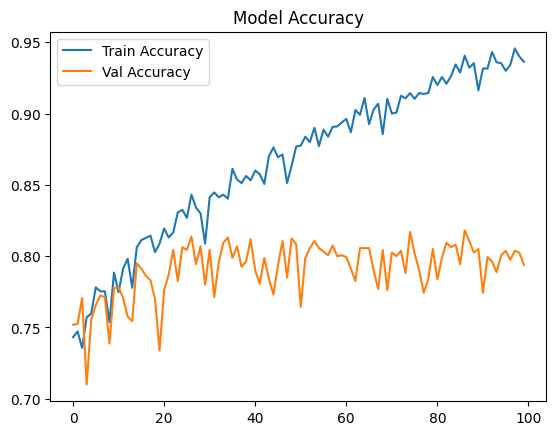

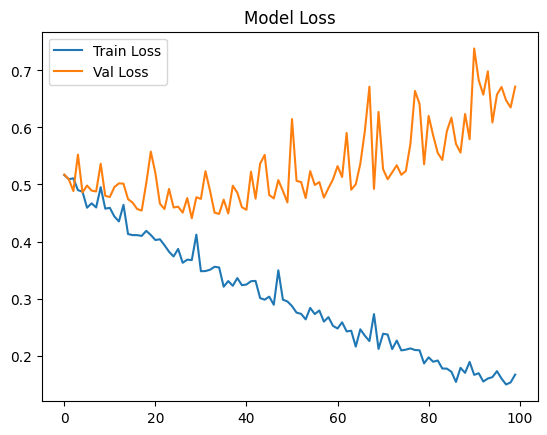

In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


In [13]:
# After training
train_accuracies = history.history['accuracy']
val_accuracies = history.history['val_accuracy']

avg_train_acc = sum(train_accuracies) / len(train_accuracies) * 100
avg_val_acc = sum(val_accuracies) / len(val_accuracies) * 100

print(f"Average Training Accuracy over 10 epochs: {avg_train_acc:.2f}%")
print(f"Average Validation Accuracy over 10 epochs: {avg_val_acc:.2f}%")


Average Training Accuracy over 10 epochs: 86.61%
Average Validation Accuracy over 10 epochs: 79.08%


In [14]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image

# 👇 Update your directory path here
single_dir = r"D:\Projects\PYTHON\catAndDog\dataset\single_prediction"

for fname in os.listdir(single_dir):
    path = os.path.join(single_dir, fname)
    img = image.load_img(path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    result = model.predict(img_array)

    prob = result[0][0]

    if prob >= 0.8:
        label = "Dog"
    elif prob <= 0.3:
        label = "Cat"
    else:
        label = "Unknown / Not confident"


    print(f"{fname}: {label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
asdfsdg.jpg: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
cat_or_dog_2.jpg: Cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
WhatsApp Image 2025-07-08 at 22.41.56_c6f2e6fb.jpg: Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
zxcv.jpg: Dog


In [15]:
# Save the entire model to a single file.
# The .keras format is the modern and recommended standard.
model.save('cat_dog_classifier.keras')

print("Model saved successfully as cat_dog_classifier.keras")

Model saved successfully as cat_dog_classifier.keras
